# Machine Learning - Supervised Learning Algorithm 
# 02) Logistic Regression Algorithm (Classification)

This is depend on probability and according it we get a catagory. In Linear regression we haven't any range but in the Logistic Linear Regression has. P-probability is always 0 < P < 1. So we use SIGMOID function to convert these Linear Regression values into 0 - 1 range. 

Here we dont use Ordinary least square technique , to find pereameters of model we use Maximum Likehood Estimate technique (MLE)

We find value for p. After find a value for p wee cuttoff it usaually we use 0.5

* There are two techniques for evaluating a model in regression. They can be used for evaluating in the classification too.

    01) Validation set approach

    02) Cross validation

* Accuracy cheecking
we have three most popular techniques to chek how to model is behavior in predictions

    01) Miss Squared Error (MCE)

    02) Accuracy = 1 - MCE

    03) F1 Square

### Qualitative Response

##### Dichotomouse / Binary Response---> FInfing P(one catagory)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [7]:
bank_data = pd.read_csv("Bank.csv")
bank_data.head() # y ---> 0 means the client did not subscribe to a term deposit.

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [8]:
x = bank_data.iloc[:, :7]   # Good practice converting into an array, for 1 column we should conert into two dimensional array
y = bank_data.iloc[:, 7]
print("x:\n---\n", x.head(), "\n")
print("y:\n---\n", y.head())

x:
---
    age  duration  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0   44       210           1.4          93.444          -36.1      4.963   
1   53       138          -0.1          93.200          -42.0      4.021   
2   28       339          -1.7          94.055          -39.8      0.729   
3   39       185          -1.8          93.075          -47.1      1.405   
4   55       137          -2.9          92.201          -31.4      0.869   

   nr_employed  
0       5228.1  
1       5195.8  
2       4991.6  
3       5099.1  
4       5076.2   

y:
---
 0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
model = LogisticRegression()

In [11]:
model.fit(x_train, y_train)

LogisticRegression()

### Like in Linear Regression here also we have same pereameters to estimate model accuracy

In [12]:
model.intercept_

array([0.00389665])

In [13]:
model.coef_

array([[ 0.00103066,  0.00453539, -0.21668038,  0.42440943,  0.05622945,
        -0.27696423, -0.00786207]])

### Let Predict 

In [14]:
y_pred = model.predict(x_test)

In [19]:
confusion_matrix(y_test, y_pred)   # Rows - actual , Columns - predictions, To get clear idea use heatmap

array([[7157,  168],
       [ 606,  307]])

### Heatmap

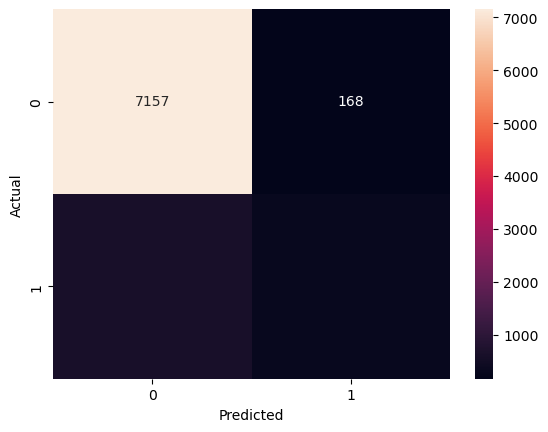

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "g")   # annot give scientific notaion, 7.2e+03 means 7.2 * 10^3
plt.xlabel("Predicted")                                                  # To see original values use fmt as g
plt.ylabel("Actual")
plt.show()

* Model has predeicted 7157 no of Actual 0 as 0 correctly, 168 actual 0 as 1 incorrectly ---> good
* But 606 no of actual 1 has predected as 0, 307 actual 1 as 1 ---> not good
* That's why accuracy is not a good perameter, check in F1 Score 0 ---> 0.95(95%)(good) but 1 ---> 44% (not good)

### Model Quality Checking

In [17]:
print("Accuracy: ", end= "")   # Accuracy is not the best way
print(accuracy_score(y_test, y_pred))
print("MCE: ", 1-accuracy_score(y_test, y_pred))

Accuracy: 0.9060451565914057
MCE:  0.09395484340859428


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.65      0.34      0.44       913

    accuracy                           0.91      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238

